In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from utils.helpers import *
import keras
from keras import layers
from keras import models
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import h5py
%matplotlib inline
keras.__version__

Using TensorFlow backend.


'2.1.3'

In [2]:
PADDING = 47
images = []
masks = []
n_img = 2
new_masks = []
for i in range(10):
    image, mask = get_image_mask_from_id(i)
    image = image / 255.
    new_mask = from_2_mask_to_3_mask(mask,10)
    images.append(image)
    masks.append(mask)
    new_masks.append(new_mask)

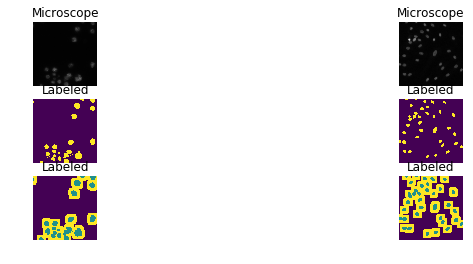

In [ ]:
fig, m_axs = plt.subplots(3, n_img, figsize = (12, 4))
for index, (c_im, c_lab, c_mas) in zip(range(n_img), m_axs.T):
    c_im.imshow(images[index])
    c_im.axis('off')
    c_im.set_title('Microscope')
    
    c_lab.imshow(masks[index])
    c_lab.axis('off')
    c_lab.set_title('Labeled')
    
    c_mas.imshow(new_masks[index])
    c_mas.axis('off')
    c_mas.set_title('Labeled')

In [ ]:
training_examples = []
labels_examples = []
for (image, mask) in zip(images, new_masks):
    train, label = get_train_test(image, mask, num_classes = 3, padding=PADDING)
    training_examples.append(train)
    labels_examples.append(label)
training_examples = np.array(training_examples)
labels_examples = np.array(labels_examples)
print(training_examples.shape)
print(labels_examples.shape)

In [ ]:
xs = []
for i in range(4):
    xs = np.concatenate((xs, np.ones((2,2)) * (i + 1)))
xs